In [1]:
from GT import get_dataset
import matplotlib.pyplot as plt
from GT import GGTM
import json
import torch
import numpy as np
import os
import seaborn as sns
from tsl.datasets.mts_benchmarks import ExchangeBenchmark
from Notebooks.Eval.VisualEval import visualization, plot_boxplots_means, plot_histograms_means


DATASET_NAME = 'ExchangeBenchmark'
MODEL_NAME= 'GGTMExchangeBenchmark'

# Magic
MODELS_PATH = f'./models'
IMAGES_PATH = f'./PNG'
DEVICE = 'cuda:1' if torch.cuda.is_available() else 'cpu' if torch.backends.mps.is_available() else 'cpu'
torch.set_default_device(DEVICE)

In [2]:
if not os.path.exists(f'{MODELS_PATH}/{DATASET_NAME}/'):
    os.makedirs(f'{MODELS_PATH}/{DATASET_NAME}')
if not os.path.exists(f'{IMAGES_PATH}/{DATASET_NAME}/'):
    os.makedirs(f'{IMAGES_PATH}/{DATASET_NAME}')
    os.makedirs(f'{IMAGES_PATH}/{DATASET_NAME}/History')
    os.makedirs(f'{IMAGES_PATH}/{DATASET_NAME}/Train')
    os.makedirs(f'{IMAGES_PATH}/{DATASET_NAME}/Validation')
    os.makedirs(f'{IMAGES_PATH}/{DATASET_NAME}/Test')

## Model parameters

In [3]:
# Model Parameters 100 hidden
hidden_size = 64
num_layers = 1
lr = 0.001
weight_decay = 0.001
# weight_decay = 0
dropout = 0.1
bidirectional = True
mixture_dim = 24
train_from_checkpoint = True

dataset = ExchangeBenchmark()

max_size = 7560

exo = dataset.datetime_encoded('day').values

dataset = dataset.dataframe()[:7560]
exo = exo[:7560]

## Dataset

In [4]:
# Dataset Split\
Train, Validation, Test = get_dataset('ExchangeBenchmark', dataset, 216)

# Train[..., 0] = Train[..., 5]

train_data = Train
train_data = torch.Tensor(train_data)
exo_var = torch.Tensor(exo).reshape(train_data.shape[0], train_data.shape[1], 2)
# exo_var = []
input_size = train_data.shape[-1]
output_size = input_size
num_time_steps = len(train_data)
exo_size = 2
# exo_var = (exo_var - exo_var.min()) / (exo_var.max() - exo_var.min())  

ExchangeBenchmark DATA
Original Dataset: 	105
Train Split: 		35 	(70%)
Validation Split: 	35 	(20%)
Test Split: 		35 	(10%)


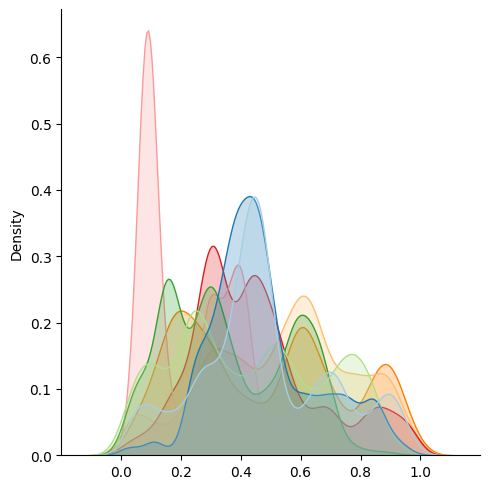

In [5]:
sns.displot(train_data.view(train_data.shape[0]*train_data.shape[1], train_data.shape[2]), fill=True, kind='kde', palette='Paired', legend=False)
plt.show()

## Model Train

In [6]:
# Model Train
model = GGTM(input_size, output_size, hidden_size, mixture_dim, dropout, num_layers, bidirectional, lr, weight_decay, ['EarlyStopping'], DEVICE, exo_size)

configs = input_size, output_size, hidden_size, mixture_dim, dropout, num_layers, bidirectional, lr, weight_decay, ['EarlyStopping'], DEVICE, exo_size
try:
    state_dict = torch.load(f'{MODELS_PATH}/{DATASET_NAME}/{MODEL_NAME}_{DATASET_NAME}')
    model.load_state_dict(state_dict)
except:
    print('Model not present or incompatible')
    train_from_checkpoint = True

if train_from_checkpoint:
    model, history = model.train_step(train_data, exo_var, batch_size=1, window=20, horizon=1, epochs=50)
    torch.save(model.state_dict(), f'{MODELS_PATH}/{DATASET_NAME}/{MODEL_NAME}_{DATASET_NAME}')
    with open(f'{MODELS_PATH}/{DATASET_NAME}/{MODEL_NAME}.hist', 'w') as hist:
        json.dump(history, hist)
    with open(f'{MODELS_PATH}/{DATASET_NAME}/{MODEL_NAME}.config', 'w') as config: 
        json.dump(configs, config)

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Thesis/lib/python3.11/site-packages/torch/nn/modules/rnn.py:88: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/var/folders/2f/0xjdq0xn6b3cfw3v2k2svn3m0000gn/T/ipykernel_61948/1026102171.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unle

Model not present or incompatible
Starting training...


  0%|          | 0/35 [00:00<?, ?it/s]/Users/paulmagos/.pyenv/versions/3.11.9/envs/Thesis/lib/python3.11/site-packages/torch/utils/_device.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/paulmagos/.pyenv/versions/3.11.9/envs/Thesis/lib/python3.11/site-packages/torch/utils/_device.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
Loss 2.7848533378328595: 100%|██████████| 35/35 [00:30<00:00,  1.15it/s]


Epoch 1 - loss: 2.7848533378328595


Loss 2.8129516298430306: 100%|██████████| 35/35 [00:28<00:00,  1.22it/s]


Epoch 2 - loss: 2.8129516298430306


Loss 2.67136887209756: 100%|██████████| 35/35 [00:27<00:00,  1.26it/s]  


Epoch 3 - loss: 2.67136887209756


Loss 2.5607717629841398: 100%|██████████| 35/35 [00:29<00:00,  1.20it/s]


Epoch 4 - loss: 2.5607717629841398


Loss 2.485447882924761: 100%|██████████| 35/35 [00:29<00:00,  1.19it/s] 


Epoch 5 - loss: 2.485447882924761


Loss 2.440982679298946: 100%|██████████| 35/35 [00:27<00:00,  1.28it/s] 


Epoch 6 - loss: 2.440982679298946


Loss 2.4135639991079056: 100%|██████████| 35/35 [00:27<00:00,  1.25it/s]


Epoch 7 - loss: 2.4135639991079056


Loss 2.3990340559823173: 100%|██████████| 35/35 [00:28<00:00,  1.23it/s]


Epoch 8 - loss: 2.3990340559823173


Loss 2.3825859716960363: 100%|██████████| 35/35 [00:27<00:00,  1.27it/s]


Epoch 9 - loss: 2.3825859716960363


Loss 2.3517868273598808: 100%|██████████| 35/35 [00:27<00:00,  1.28it/s]


Epoch 10 - loss: 2.3517868273598808


Loss 2.3305385892731802: 100%|██████████| 35/35 [00:27<00:00,  1.26it/s]


Epoch 11 - loss: 2.3305385892731802


Loss 2.305710578305381: 100%|██████████| 35/35 [00:28<00:00,  1.22it/s] 


Epoch 12 - loss: 2.305710578305381


Loss 2.2789875943320137: 100%|██████████| 35/35 [00:27<00:00,  1.27it/s]


Epoch 13 - loss: 2.2789875943320137


Loss 2.254881799902235: 100%|██████████| 35/35 [00:27<00:00,  1.26it/s] 


Epoch 14 - loss: 2.254881799902235


Loss 2.230094186919076: 100%|██████████| 35/35 [00:27<00:00,  1.27it/s] 


Epoch 15 - loss: 2.230094186919076


Loss 2.204702751295907: 100%|██████████| 35/35 [00:27<00:00,  1.26it/s] 


Epoch 16 - loss: 2.204702751295907


Loss 2.183394339084625: 100%|██████████| 35/35 [00:27<00:00,  1.28it/s] 


Epoch 17 - loss: 2.183394339084625


Loss 2.1588063519341607: 100%|██████████| 35/35 [00:28<00:00,  1.24it/s]


Epoch 18 - loss: 2.1588063519341607


Loss 2.134328530515943: 100%|██████████| 35/35 [00:29<00:00,  1.19it/s] 


Epoch 19 - loss: 2.134328530515943


Loss 2.1082970792906623: 100%|██████████| 35/35 [00:28<00:00,  1.23it/s]


Epoch 20 - loss: 2.1082970792906623


Loss 2.083998750277928: 100%|██████████| 35/35 [00:28<00:00,  1.22it/s] 


Epoch 21 - loss: 2.083998750277928


Loss 2.0653193051474434: 100%|██████████| 35/35 [00:28<00:00,  1.21it/s]


Epoch 22 - loss: 2.0653193051474434


Loss 2.046741224016462: 100%|██████████| 35/35 [00:29<00:00,  1.19it/s] 


Epoch 23 - loss: 2.046741224016462


Loss 2.0474542083059037: 100%|██████████| 35/35 [00:29<00:00,  1.21it/s]


Epoch 24 - loss: 2.0474542083059037


Loss 2.0118169917379105: 100%|██████████| 35/35 [00:29<00:00,  1.21it/s]


Epoch 25 - loss: 2.0118169917379105


Loss 2.0090097958701: 100%|██████████| 35/35 [00:29<00:00,  1.20it/s]   


Epoch 26 - loss: 2.0090097958701


Loss 1.991423897743225: 100%|██████████| 35/35 [00:29<00:00,  1.20it/s] 


Epoch 27 - loss: 1.991423897743225


Loss 1.969155297279358: 100%|██████████| 35/35 [00:29<00:00,  1.20it/s] 


Epoch 28 - loss: 1.969155297279358


Loss 1.9628512787818908: 100%|██████████| 35/35 [00:29<00:00,  1.20it/s]


Epoch 29 - loss: 1.9628512787818908


Loss 1.9534340528079441: 100%|██████████| 35/35 [00:29<00:00,  1.19it/s]


Epoch 30 - loss: 1.9534340528079441


Loss 1.9295797150475638: 100%|██████████| 35/35 [00:29<00:00,  1.20it/s]


Epoch 31 - loss: 1.9295797150475638


Loss 1.9252580782345363: 100%|██████████| 35/35 [00:29<00:00,  1.19it/s]


Epoch 32 - loss: 1.9252580782345363


Loss 1.9086021832057407: 100%|██████████| 35/35 [00:29<00:00,  1.20it/s]


Epoch 33 - loss: 1.9086021832057407


Loss 1.9004477528163366: 100%|██████████| 35/35 [00:29<00:00,  1.18it/s]


Epoch 34 - loss: 1.9004477528163366


Loss 1.8762954698290144: 100%|██████████| 35/35 [00:30<00:00,  1.14it/s]


Epoch 35 - loss: 1.8762954698290144


Loss 1.8761406925746373: 100%|██████████| 35/35 [00:30<00:00,  1.15it/s]


Epoch 36 - loss: 1.8761406925746373


Loss 1.8551163833481925: 100%|██████████| 35/35 [00:30<00:00,  1.15it/s]


Epoch 37 - loss: 1.8551163833481925


Loss 1.8490594979694912: 100%|██████████| 35/35 [00:30<00:00,  1.13it/s]


Epoch 38 - loss: 1.8490594979694912


Loss 1.8409231397083827: 100%|██████████| 35/35 [00:30<00:00,  1.16it/s]


Epoch 39 - loss: 1.8409231397083827


Loss 1.839646543775286: 100%|██████████| 35/35 [00:30<00:00,  1.16it/s] 


Epoch 40 - loss: 1.839646543775286


Loss 1.8278020589692252: 100%|██████████| 35/35 [00:29<00:00,  1.18it/s]


Epoch 41 - loss: 1.8278020589692252


Loss 1.8181301178250995: 100%|██████████| 35/35 [00:29<00:00,  1.18it/s]


Epoch 42 - loss: 1.8181301178250995


Loss 1.8060087176731654: 100%|██████████| 35/35 [00:29<00:00,  1.20it/s]


Epoch 43 - loss: 1.8060087176731654


Loss 1.7959627332006183: 100%|██████████| 35/35 [00:30<00:00,  1.15it/s]


Epoch 44 - loss: 1.7959627332006183


Loss 1.7881752705574037: 100%|██████████| 35/35 [00:29<00:00,  1.18it/s]


Epoch 45 - loss: 1.7881752705574037


Loss 1.7850271269253322: 100%|██████████| 35/35 [00:30<00:00,  1.16it/s]


Epoch 46 - loss: 1.7850271269253322


Loss 1.777672916821071: 100%|██████████| 35/35 [00:29<00:00,  1.17it/s] 


Epoch 47 - loss: 1.777672916821071


Loss 1.7720053049496243: 100%|██████████| 35/35 [00:29<00:00,  1.17it/s]


Epoch 48 - loss: 1.7720053049496243


Loss 1.7658738585880824: 100%|██████████| 35/35 [00:30<00:00,  1.16it/s]


Epoch 49 - loss: 1.7658738585880824


Loss 1.756962092944554: 100%|██████████| 35/35 [00:30<00:00,  1.15it/s] 

Epoch 50 - loss: 1.756962092944554


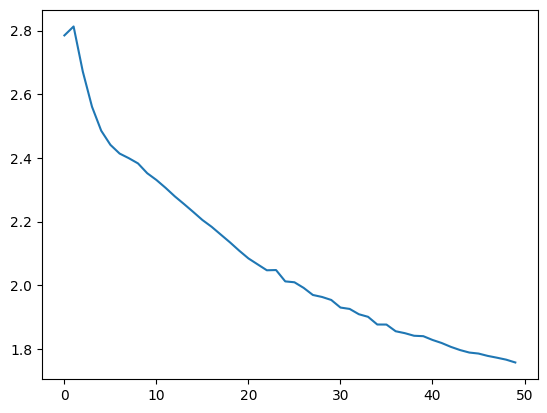

<Figure size 640x480 with 0 Axes>

In [7]:
with open(f'{MODELS_PATH}/{DATASET_NAME}/{MODEL_NAME}.hist', 'r') as hist:
    history = json.load(hist)
    
for key, values in history.items():
    plt.plot(values, label=key)
plt.show()
plt.savefig(f'{IMAGES_PATH}/{DATASET_NAME}/History/{MODEL_NAME}_History.png')
plt.clf()

# Model Eval


In [8]:
exo_var = torch.cat([exo_var, exo_var, exo_var, exo_var, exo_var, exo_var, exo_var, exo_var], dim=0)

In [9]:
output = model.generate_step(shape=(10, 216, 8), exo_var=exo_var.view(exo_var.shape[0]*exo_var.shape[1], exo_var.shape[2])[-2210:].view(10, 221, exo_var.shape[2]), window = 5, horizon=1)
prediction = model.predict_step(data=train_data[0:10], exo_var=exo_var[:10], steps=216, window=5)

  0%|          | 0/216 [00:00<?, ?it/s]/Users/paulmagos/.pyenv/versions/3.11.9/envs/Thesis/lib/python3.11/site-packages/torch/utils/_device.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
100%|██████████| 216/216 [00:06<00:00, 32.81it/s]


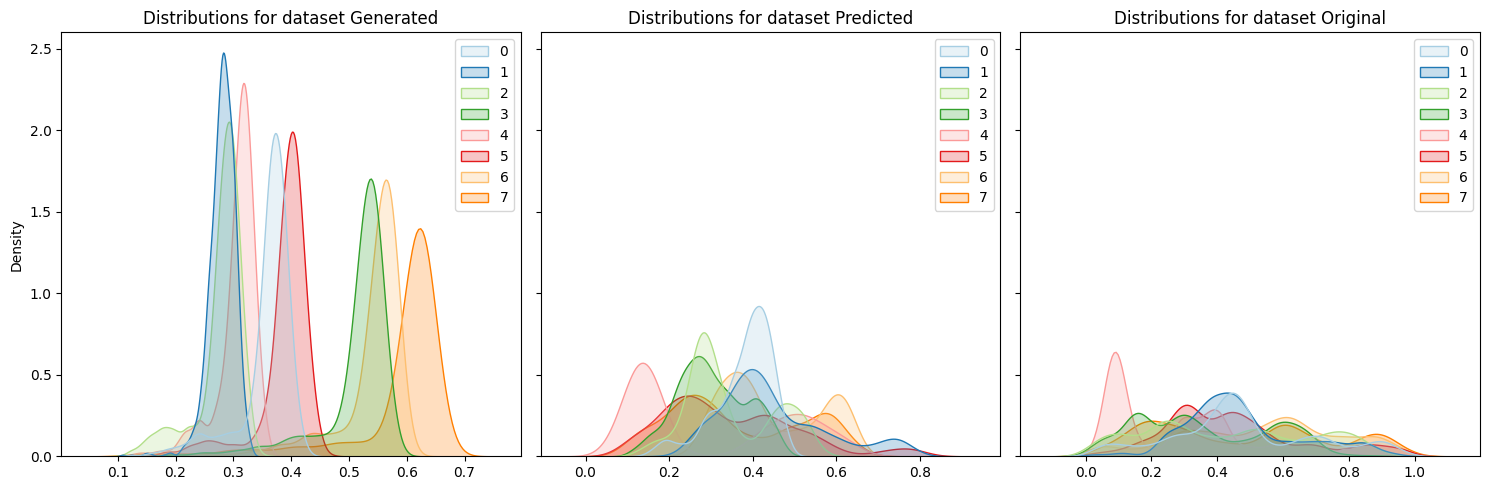

In [10]:
def plot_dist(datasets, kind='kde'):
    # Create a figure with 3 subplots
    fig, ax = plt.subplots(1, len(datasets), figsize=(15, 5), sharey=True, sharex=False)
    if kind == 'box':
        plot_ = sns.boxplot
    elif kind == 'ecdf':
        plot_ = sns.ecdfplot
    elif kind == 'kde':
        plot_ = sns.kdeplot
    else:
        plot_ = sns.histplot

    reshaped_output = {}
    for key, gen in datasets.items():
        # Reshape the data to combine samples and time steps (flatten them)
        reshaped_output[key] = gen.reshape(gen.shape[0] * gen.shape[1], gen.shape[2])
        
    # Plot KDE for each feature (assuming output has 3 features)
    for i, item in zip(range(0, len(reshaped_output)), reshaped_output.items()):
        k, data = item
        if kind == 'kde':
            plot_(data, ax=ax[i], palette='Paired', fill=True, legend='auto')
        else:
            plot_(data, ax=ax[i], palette='Paired')
        ax[i].set_title(f'Distributions for dataset {k}')

    # Show the plot
    plt.tight_layout()
    plt.show()
plot_dist({'Generated': output, 'Predicted': prediction, 'Original': train_data}, 'kde')

/var/folders/2f/0xjdq0xn6b3cfw3v2k2svn3m0000gn/T/ipykernel_61948/401341584.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data.reshape(train_data.shape[0]*train_data.shape[1], -1), label='True')
/var/folders/2f/0xjdq0xn6b3cfw3v2k2svn3m0000gn/T/ipykernel_61948/401341584.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297

<Axes: ylabel='Density'>

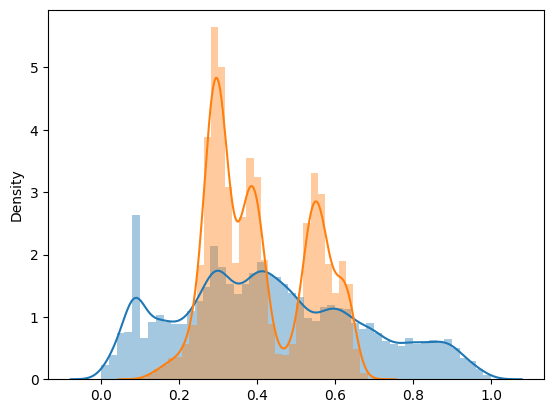

In [11]:
sns.distplot(train_data.reshape(train_data.shape[0]*train_data.shape[1], -1), label='True')
sns.distplot(output.reshape(output.shape[0]*output.shape[1], -1), label='Gen')
# sns.distplot(prediction.reshape(prediction.shape[0]*prediction.shape[1], -1))

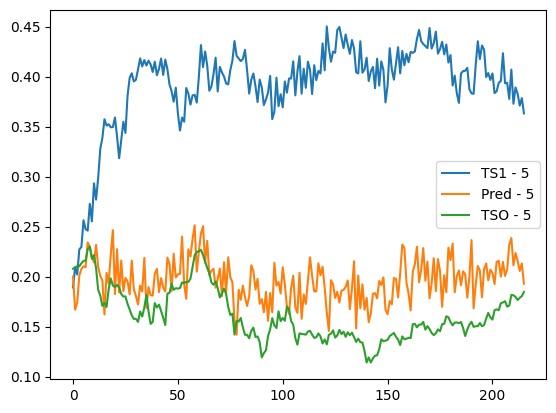

In [12]:
plt.plot(output[3, :, 5], label='TS1 - 5') 

plt.plot(prediction[1, :, 5], label='Pred - 5')

plt.plot(train_data[1, :, 5], label='TSO - 5')
plt.legend()
plt.show()

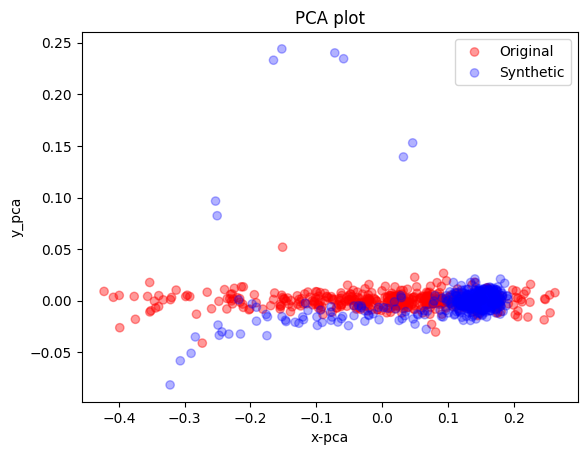

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Thesis/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 864 samples in 0.000s...
[t-SNE] Computed neighbors for 864 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 864 / 864
[t-SNE] Mean sigma: 0.008156
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.148254
[t-SNE] KL divergence after 300 iterations: 0.686426


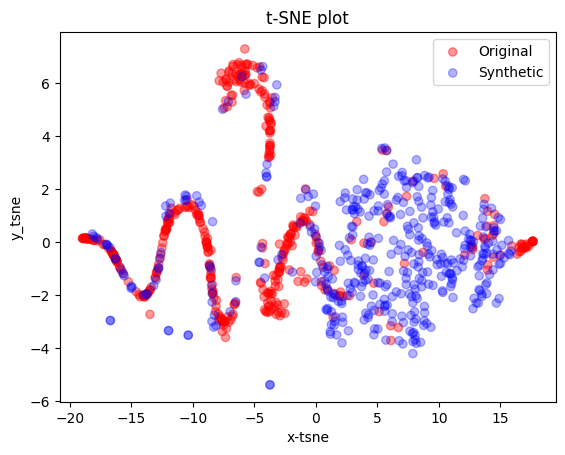

In [13]:
mlen = train_data.shape[0]*train_data.shape[1] // 5
olen =  output.shape[0]*output.shape[1] // 5
visualization(train_data.reshape(mlen, 5, 8)[:olen], torch.Tensor(output).reshape(olen, 5, 8), 'pca')
visualization(train_data.reshape(mlen, 5, 8)[:olen], torch.Tensor(output).reshape(olen, 5, 8), 'tsne')

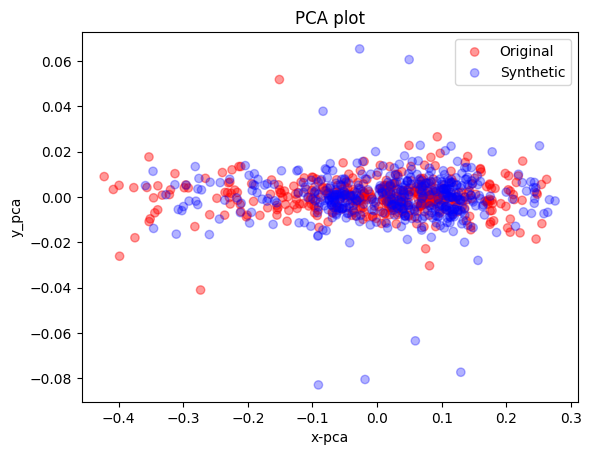

/Users/paulmagos/.pyenv/versions/3.11.9/envs/Thesis/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 864 samples in 0.000s...
[t-SNE] Computed neighbors for 864 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 864 / 864
[t-SNE] Mean sigma: 0.009411
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.604630
[t-SNE] KL divergence after 300 iterations: 0.610930


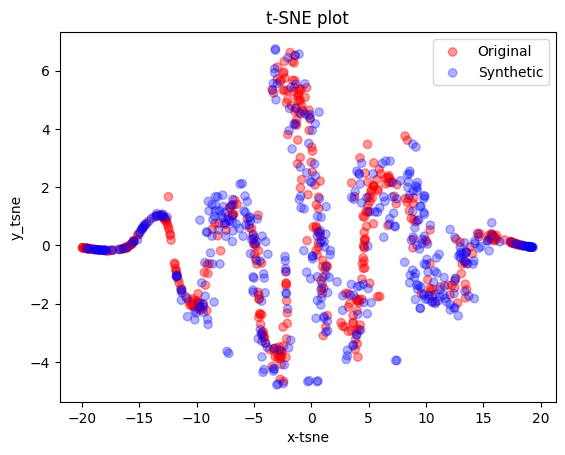

In [14]:
plen = prediction.shape[0]*output.shape[1] // 5
visualization(train_data.reshape(mlen, 5, 8)[:plen], torch.Tensor(prediction).reshape(plen, 5, 8), 'pca')
visualization(train_data.reshape(mlen, 5, 8)[:plen], torch.Tensor(prediction).reshape(plen, 5, 8), 'tsne')

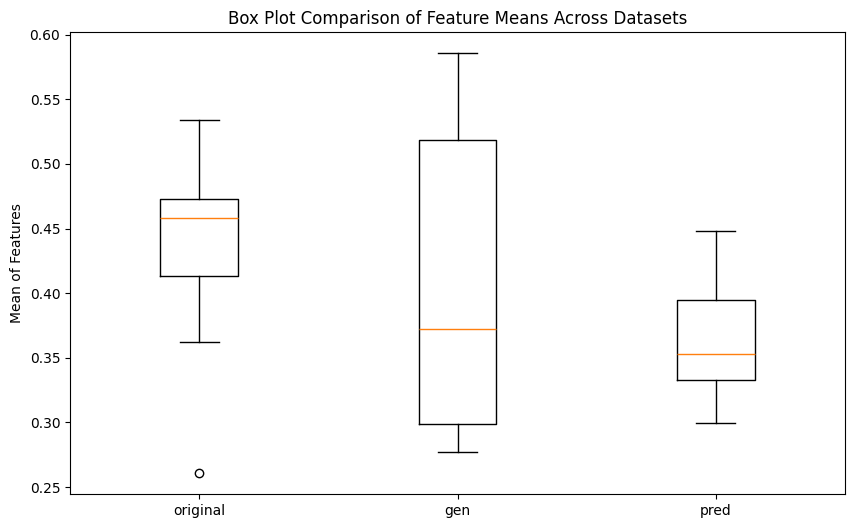

In [15]:
plot_boxplots_means(('original', np.array(train_data.reshape(mlen*5, 8))), ('gen', output.reshape(olen*5, 8)), ('pred', prediction.reshape(plen*5, 8)))